# Paper Replicating

We're going to replicate a **machine learning research paper** and create Vision Transformer(ViT), a state-of-the-art computer vision architecture from scratch using PyTorch.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-applying-vit-to-food-vision-mini.png">

## What is paper replicating?

Paper replicating refers to the process of reproducing the results of a published research paper. This involves independently conducting the same experiments or analyses as the original study to determine if the same findings can be obtained. Replication is a fundamental aspect of the scientific method because it helps to verify the reliability and validity of research findings.

The goal of **paper replicating** is to replicate these advances with code so you can use the techniques for your own problem.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-what-is-paper-replicating-images-math-text-to-code.png">

*Machine learning paper replicating involves turning a machine learning paper comprised of images/diagrams, math and text into usable code and in our case, usable PyTorch code. Diagram, math equations and text from the [ViT paper](https://arxiv.org/abs/2010.11929).*

## What is a machine learning research paper?

A machine learning research paper is a scientific paper that details findings of a research group on a specific area.

The contents of a machine learning research paper can vary from paper to paper but they generally follow the structure:

| Section      | Contents                                                                                      |
|--------------|-----------------------------------------------------------------------------------------------|
| Abstract     | A summary of the main findings and contributions of the paper.                                |
| Introduction | The main problem addressed by the paper and a review of previous methods used to tackle it.   |
| Method       | The approach taken by the researchers, including models, data sources, and training setups.   |
| Results      | The outcomes of the research, comparing new models or setups with previous work.              |
| Conclusion   | The limitations of the proposed methods and suggestions for future research directions.       |
| References   | The sources and papers referenced by the researchers to support their work.                   |
| Appendix     | Additional resources or findings that weren't included in the main sections of the paper.     |

## Why replicate a machine learning research paper?

A machine learning research paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed into a few pages of text.

And if these experiments lead to better results in an area related to the problem you're working on, it'd be nice to check them out.

Also, replicating the work of others is a fantastic way to practice your skills.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-george-hotz-quote.png">


## Where can you find code examples for machine learning research papers?

- [arXiv](https://arxiv.org/)
- [AK Twitter](https://twitter.com/_akhaliq)
- [Papers with Code](https://paperswithcode.com/)
- [Google Scholar](https://scholar.google.com/)
- [lucidrains' `vit-pytorch` GitHub repository](https://github.com/lucidrains/vit-pytorch)

## What we're going to cover

We will replicate the machine learning research paper [*An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale*](https://arxiv.org/abs/2010.11929) (ViT paper) using PyTorch. By replicating this paper, we aim to understand the process and gain momentum for future replications.

The **Transformer neural network architecture**, introduced in the paper [*Attention is All You Need*](https://arxiv.org/abs/1706.03762) was originally designed for one-dimensional text sequences and is characterized by its use of the attention mechanism as the primary learning layer.

The **Vision Transformer**(ViT) adapts the Transformer architecture for vision problems, starting with image classification. Although the ViT has evolved over time, we will focus on replicating the original version, known as the "vanilla Vision Transformer." Mastering this will enable us to adapt to newer versions.

Our goal is to build the ViT architecture according to the original paper and apply it to the FoodVision Mini dataset.

| Topic                                        | Contents                                                                                                               |
|----------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| 0. Getting setup                             | We've written useful code in previous sections, let's download it and ensure we can use it again.                       |
| 1. Get data                                  | Let's get the pizza, steak, and sushi image classification dataset and build a Vision Transformer to improve FoodVision Mini results. |
| 2. Create Datasets and DataLoaders           | We'll use the data_setup.py script from chapter 05, PyTorch Going Modular, to set up our DataLoaders.                    |
| 3. Replicating the ViT paper: an overview    | Replicating a machine learning paper can be challenging, so let's break down the ViT paper into smaller parts to replicate it step by step. |
| 4. Equation 1: The Patch Embedding           | The ViT architecture has four main equations; the first is the patch and position embedding, which turns an image into a sequence of learnable patches. |
| 5. Equation 2: Multi-Head Attention (MSA)    | The self-attention/multi-head self-attention (MSA) mechanism is central to every Transformer, including ViT. Let's create an MSA block using PyTorch's built-in layers. |
| 6. Equation 3: Multilayer Perceptron (MLP)   | The ViT uses a multilayer perceptron in its Transformer Encoder and output layer. Let's create an MLP for the Transformer Encoder. |
| 7. Creating the Transformer Encoder          | A Transformer Encoder has alternating layers of MSA (equation 2) and MLP (equation 3) connected via residual connections. Let's stack the layers from sections 5 & 6 to create one. |
| 8. Putting it all together to create ViT     | We have all the components to create the ViT architecture, so let's combine them into a single class for our model.     |
| 9. Setting up training code for our ViT model| Training our custom ViT is similar to the other models we've trained. With our train() function in engine.py, we can start training with a few lines of code. |
| 10. Using a pretrained ViT from torchvision.models | Training a large model like ViT needs a lot of data. Since we have a small dataset, let's use transfer learning to improve our results. |
| 11. Make predictions on a custom image       | The magic of machine learning is seeing it work on your own data. |



## 0. Getting setup

We'll continue with the regular imports, setting up device agnostic code and this time we'll also get the `helper_functions.py` script from GitHub.

To save us writing extra code, we're going to be leveraging some of the Python scripts (such as `data_setup.py`, `dataset.py` and `engine.py`) we created in the previous section, [05_PyTorch_Going_Modular](https://github.com/LuluW8071/Data-Science/tree/main/Pytorch/05_PyTorch_Going_Modular/going_modular).

- `data_setup.py`: downloads the dataset
- `dataset.py`: contains the train and test dataloader functions
- `engine.py`: contains the train and test loop functions


In [1]:
# Importing Libraries
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms

# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [2]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

# Download and Load the going_modular scripts
try:
    from going_modular import data_setup, dataset, engine
    from assets import helper_functions
except ImportError:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/LuluW8071/Data-Science/
    !mv Data-Science/assets .
    !mv Data-Science/03_Deep_Learning_in_PyTorch/05_PyTorch_Going_Modular/going_modular .
    !rm -rf Data-Science
    from going_modular import data_setup, dataset, engine
    from assets import helper_functions

Downloading...
From (original): https://drive.google.com/uc?id=1J0syU84FNmtxkf9AzDPdRSDmtUr1CSy8
From (redirected): https://drive.google.com/uc?id=1J0syU84FNmtxkf9AzDPdRSDmtUr1CSy8&confirm=t&uuid=a4550a3c-dab0-4391-bff0-4de8deecfcdf
To: /content/Food_dataset.zip
100%|██████████| 367M/367M [00:05<00:00, 70.6MB/s]


Files extracted successfully to: ./dataset


## 1. Get Data

In [26]:
# Setup directory paths to train and test images
train_dir = "dataset/train"
test_dir = "dataset/test"

## 2. Create Datasets and DataLoaders

We can use the `create_dataloaders()` function in `data_setup.py` to transform the images as per mentioned in ViT paper where height being 224px and width being 224px.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-image-size-and-batch-size.png">

*You can often find various hyperparameter settings listed in a table. In this case we're still preparing our data, so we're mainly concerned with things like image size and batch size. Source: Table 3 in [ViT paper](https://arxiv.org/abs/2010.11929).*

And since we'll be training our model from scratch (no transfer learning to begin with), we won't provide a `normalize` transform.

### 2.1 Prepare transforms for images

In [27]:
# Transforming images
img_transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor()])

img_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

### 2.2 Turn images into DataLoader

The ViT paper states the use of a batch size of 4096 which is 128x the size of the batch size 32 and 64x the size of the batch size 64.

Due to hardware limitation provided by colab, here we'll be using batch size 64 instead of 4096.

>Note: We're using the `pin_memory=True` parameter in the `create_dataloaders()` function to speed up computation. `pin_memory=True` avoids unnecessary copying of memory between the CPU and GPU memory by "pinning" examples that have been seen before. Though the benefits of this will likely be seen with larger dataset sizes. However, setting `pin_memory=True` doesn't always improve performance (this is another one of those we're scenarios in machine learning where some things work sometimes and don't other times), so best to experiment, experiment, experiment. See the PyTorch [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) documentation or [Making Deep Learning Go Brrrr from First Principles](https://horace.io/brrr_intro.html) by Horace He for more.

In [28]:
# Set the batch size
BATCH_SIZE = 64

# Create dataloaders
train_dataloader, test_dataloader, class_names = dataset.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=img_transform,
    batch_size=BATCH_SIZE,
    num_workers = 2
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f7df22433a0>,
 ['donuts',
  'dumplings',
  'ice_cream',
  'pizza',
  'ramen',
  'samosa',
  'steak',
  'sushi'])

### 2.3 Visualize a single image

In [29]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[1], label_batch[1]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(4))

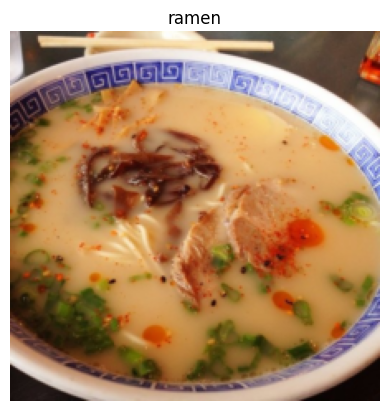

In [30]:
# Plot iamge with matplotlib
plt.imshow(image.permute(1, 2, 0))  # Rearrange img dimenstions for matplotlib
plt.title(class_names[label])
plt.axis(False);

## 3. Replicating the ViT paper: an overview

Our model inputs are: donuts, dumplings, ice_cream, pizza, ramen, samosa, steak, and sushi.

And our ideal model outputs are: predicted labels of donuts, dumplings, ice_cream, pizza, ramen, samosa, steak, or sushi.

Same as before but with ViT as our model.

### 3.1 Inputs and outputs, layers and blocks

ViT is a deep learning neural network architecture.
And any neural network architecture is generally comprised of **layers**. And a collection of layers is often referred to as a **block**. And stacking many blocks together is what gives us the whole architecture.


- **Layer** - takes an input, performs a function on it, returns an output.

- **Block** - a collection of layers, takes an input, performs a series of functions on it, returns an output.
    
- **Architecture (or model)** - a collection of blocks, takes an input, performs a series of functions on it, returns an output.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-intputs-outputs-layers-and-blocks.png">

*A modern deep learning architecture is usually collection of layers and blocks. Where layers take an input (data as a numerical representation) and manipulate it using some kind of function (for example, the self-attention formula pictured above, however, this function could be almost anything) and then output it. Blocks are generally stacks of layers on top of each other doing a similar thing to a single layer but multiple times.*

</br>


### 3.2 Getting specific: What's ViT made of?


1. **Figure 1** - This gives an overview of the model in a graphical sense, you could almost recreate the architecture with this figure alone.
    
2. **Four equations in section 3.1** - These equations give a little bit more of a mathematical grounding to the coloured blocks in Figure 1.

3. **Table 1** - This table shows the various hyperparameter settings (such as number of layers and number of hidden units) for different ViT model variants. We'll be focused on the smallest version, ViT-Base.

#### 3.2.1 Exploring Figure 1

The main things we'll be paying attention to are:

1. **Layers** - takes an **input**, performs an operation or function on the input, produces an **output**.

2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs.png">

*Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers and blocks that create the architecture. Our goal will be to replicate each of these using PyTorch code.*

The ViT architecture is comprised of several stages:

- **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.

- **Linear projection of flattened patches (Embedded Patches)** - The image patches get turned into an embedding, the benefit of using an embedding rather than just the image values is that an embedding is a learnable representation (typically in the form of a vector) of the image that can improve with training.

- **Norm** - This is short for "Layer Normalization" or "LayerNorm", a technique for regularizing (reducing overfitting) a neural network, you can use LayerNorm via the PyTorch layer `torch.nn.LayerNorm()`.

- **Multi-Head Attention** - This is a Multi-Headed Self-Attention layer or "MSA" for short. You can create an MSA layer via the PyTorch layer `torch.nn.MultiheadAttention()`.

- **MLP (or Multilayer perceptron)** - A MLP can often refer to any collection of feedforward layers (or in PyTorch's case, a collection of layers with a forward() method). In the ViT Paper, the authors refer to the MLP as "MLP block" and it contains two `torch.nn.Linear()` layers with a `torch.nn.GELU()` non-linearity activation in between them (section 3.1) and a `torch.nn.Dropout()` layer after each (Appendex B.1).

- **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above. There are two skip connections inside the Transformer encoder (the "+" symbols) meaning the layer's inputs are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transformer encoders stacked on top of eachother.

- **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class output. Since we're working on image classification, you could also call this the "classifier head". The structure of the MLP Head is similar to the MLP block.

>**Question:** Why not code everything from scratch?
</br>You could definitely do that by reproducing all of the math equations from the paper with custom PyTorch layers and that would certainly be an educative exercise, however, using pre-existing PyTorch layers is usually favoured as pre-existing layers have often been extensively tested and performance checked to make sure they run correctly and fast.

>Note: We're going to be focused on writing PyTorch code to create these layers. For the background on what each of these layers does, I'd suggest reading the ViT Paper in full or reading the linked resources for each layer.


Let's take Figure 1 and adapt it to our FoodVision Mini problem of classifying images of food into pizza, steak or sushi.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-figure-1-inputs-and-outputs-food-mini.png">

*Figure 1 from the ViT Paper adapted for use with FoodVision Mini. An image of food goes in (pizza), the image gets turned into patches and then projected to an embedding. The embedding then travels through the various layers and blocks and (hopefully) the class "pizza" is returned.*




#### 3.2.2 Exploring the Four Equations

The next main part(s) of the ViT paper we're going to look at are the four equations in section 3.1.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png">

*These four equations represent the math behind the four major parts of the ViT architecture.*

| **Equation number** | **Description from ViT paper section 3.1** |
| ----- | ----- |
| 1 | ...The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a **trainable linear projection** (Eq. 1). We refer to the output of this projection as the **patch embeddings**... **Position embeddings** are added to the patch embeddings to retain positional information. We use standard **learnable 1D position embeddings**...|
| 2 | The Transformer encoder (Vaswani et al., 2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). **Layernorm (LN) is applied before every block**, and **residual connections after every block** (Wang et al., 2019; Baevski & Auli, 2019). |
| 3 | Same as equation 2. |
| 4 | Similar to BERT's [ class ] token, we **prepend a learnable embedding to the sequence of embedded patches** $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4)... |

Let's map these descriptions to the ViT architecture in Figure 1.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-mapping-the-four-equations-to-figure-1.png" width=1000 alt="mapping the vision transformer paper figure 1 to the four equations listed in the paper"/>

*Connecting Figure 1 from the ViT paper to the four equations from section 3.1 describing the math behind each of the layers/blocks.*

There's a lot happening in the image above but following the coloured lines and arrows reveals the main concepts of the ViT architecture.

How about we break down each equation further (it will be our goal to recreate these with code)? In all equations (except equation 4), "$\mathbf{z}$" is the raw output of a particular layer:

1. $\mathbf{z}_{0}$ is "z zero" (this is the output of the initial patch embedding layer).
2. $\mathbf{z}_{\ell}^{\prime}$ is "z of a particular layer *prime*" (or an intermediary value of z).
3. $\mathbf{z}_{\ell}$ is "z of a particular layer".

And $\mathbf{y}$ is the overall output of the architecture.



#### 3.2.3 Equation 1 overview

$$
\begin{aligned}
\mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D}
\end{aligned}
$$

This equation deals with the class token, patch embedding and position embedding ($\mathbf{E}$ is for embedding) of the input image.

In vector form, the embedding might look something like:

```python
x_input = [class_token, image_patch_1, image_patch_2, image_patch_3...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position...]
```

Where each of the elements in the vector is learnable (their `requires_grad=True`).

#### 3.2.4 Equation 2 overview

$$
\begin{aligned}
\mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L
\end{aligned}
$$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's a Multi-Head Attention layer (MSA) wrapping a LayerNorm layer (LN).

The addition on the end is the equivalent of adding the input to the output and forming a [skip/residual connection](https://paperswithcode.com/method/residual-connection).

We'll call this layer the "MSA block".

In pseudocode, this might look like:

```python
x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input
```

Notice the skip connection on the end (adding the input of the layers to the output of the layers).

#### 3.2.5 Equation 3 overview

$$
\begin{aligned}
\mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\
\end{aligned}
$$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's also a Multilayer Perceptron layer (MLP) wrapping a LayerNorm layer (LN).

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer the "MLP block".

In pseudocode, this might look like:

```python
x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block
```

Notice the skip connection on the end (adding the input of the layers to the output of the layers).

#### 3.2.6 Equation 4 overview

$$
\begin{aligned}
\mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & &
\end{aligned}
$$

This says for the last layer $L$, the output $y$ is the 0 index token of $z$ wrapped in a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block`:

```python
y = Linear_layer(LN_layer(x_output_MLP_block[0]))
```

Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

> **Note:** The above section covers alot of information. But don't forget if something doesn't make sense, you can always research it further. By asking questions like "what is a residual connection?".

#### 3.2.7 Exploring Table 1

The final piece of the ViT architecture puzzle we'll focus on (for now) is Table 1.

| Model | Layers | Hidden size $D$ | MLP size | Heads | Params |
| :--- | :---: | :---: | :---: | :---: | :---: |
| ViT-Base | 12 | 768 | 3072 | 12 | $86M$ |
| ViT-Large | 24 | 1024 | 4096 | 16 | $307M$ |
| ViT-Huge | 32 | 1280 | 5120 | 16 | $632M$ |

<div align=center>
    <i>Table 1: Details of Vision Transformer model variants. Source: <a href="https://arxiv.org/abs/2010.11929">ViT paper</a>.</i>
</div>
<br>

This table showcasing the various hyperparameters of each of the ViT architectures.

You can see the numbers gradually increase from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base (start small and scale up when necessary) but we'll be writing code that could easily scale up to the larger variants.

Breaking the hyperparameters down:
* **Layers** - How many Transformer Encoder blocks are there? (each of these will contain a MSA block and MLP block)
* **Hidden size $D$** - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better results. However, a larger embedding comes at the cost of more compute.
* **MLP size** - What are the number of hidden units in the MLP layers?
* **Heads** - How many heads are there in the Multi-Head Attention layers?
* **Params** - What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more compute. You'll notice even ViT-Base has far more parameters than any other model we've used so far.

We'll use these values as the hyperparameter settings for our ViT architecture.

## 4. Equation 1: Split data into patches and creating the class, position and patch embedding

> The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the patch embeddings.

Let's break down the text above.

- $D$ is the size of the patch embeddings, different values for $D$ for various sized ViT models can be found in Table 1.
- The image starts as 2D with size ${H \times W \times C}$.
    - $(H, W)$ is the resolution of the original image (height, width).
    - $C$ is the number of channels.
- The image gets converted to a sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.
    - $(P, P)$ is the resolution of each image patch (patch size).
    - $N=H W / P^{2}$ is the resulting number of patches, which also serves as the input sequence length for the Transformer.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-equation-1-annotated.png">

### 4.1 Calculating patch embedding input and output shapes by hand


In [31]:
height, width, color_channels = 224, 224, 3
patch_size = 16

# Calculate no. of patches
no_of_patches = int((height * width) / patch_size**2)
print(f"No. of patches: {no_of_patches}\nImage Height: {height}\nImage Width: {width}")

No. of patches: 196
Image Height: 224
Image Width: 224


In [32]:
# Input Shape (Image Size)
embedding_layer_input_shape = (height, width, color_channels)

# Output Shape
embedding_layer_output_shape = (no_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


### 4.2 Turning a single image into patches

Let's visualize the single image, break it down into small patches and create the patch embedding layer.

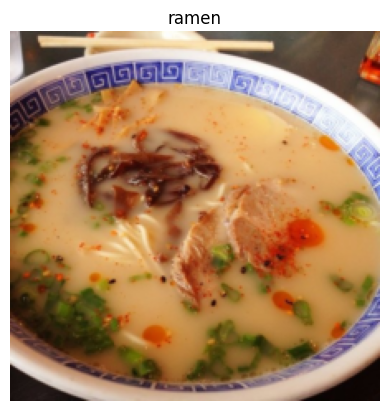

In [33]:
# View a single image
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

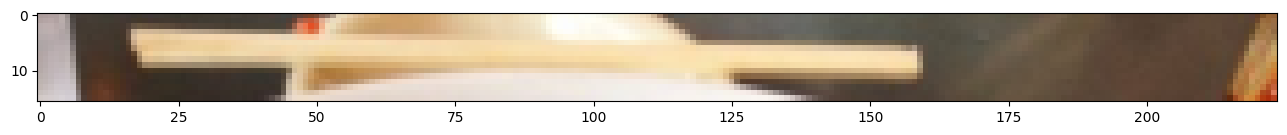

In [34]:
# Change image shape to be compatible with matplotlib (color_channels, height, width) -> (height, width, color_channels)
image_permuted = image.permute(1, 2, 0)

# Index to plot the top row of patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

In [35]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size

assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"No of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")

No of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


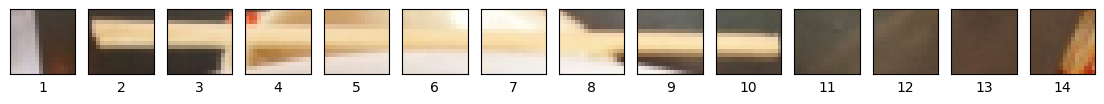

In [36]:
# Create a series of subplots
fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size, # one column for each patch
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]); # Keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

No of patches per row : 14         
No of patches per column: 14         
Total patches: 196         
Patch size: 16 pixels x 16 pixels


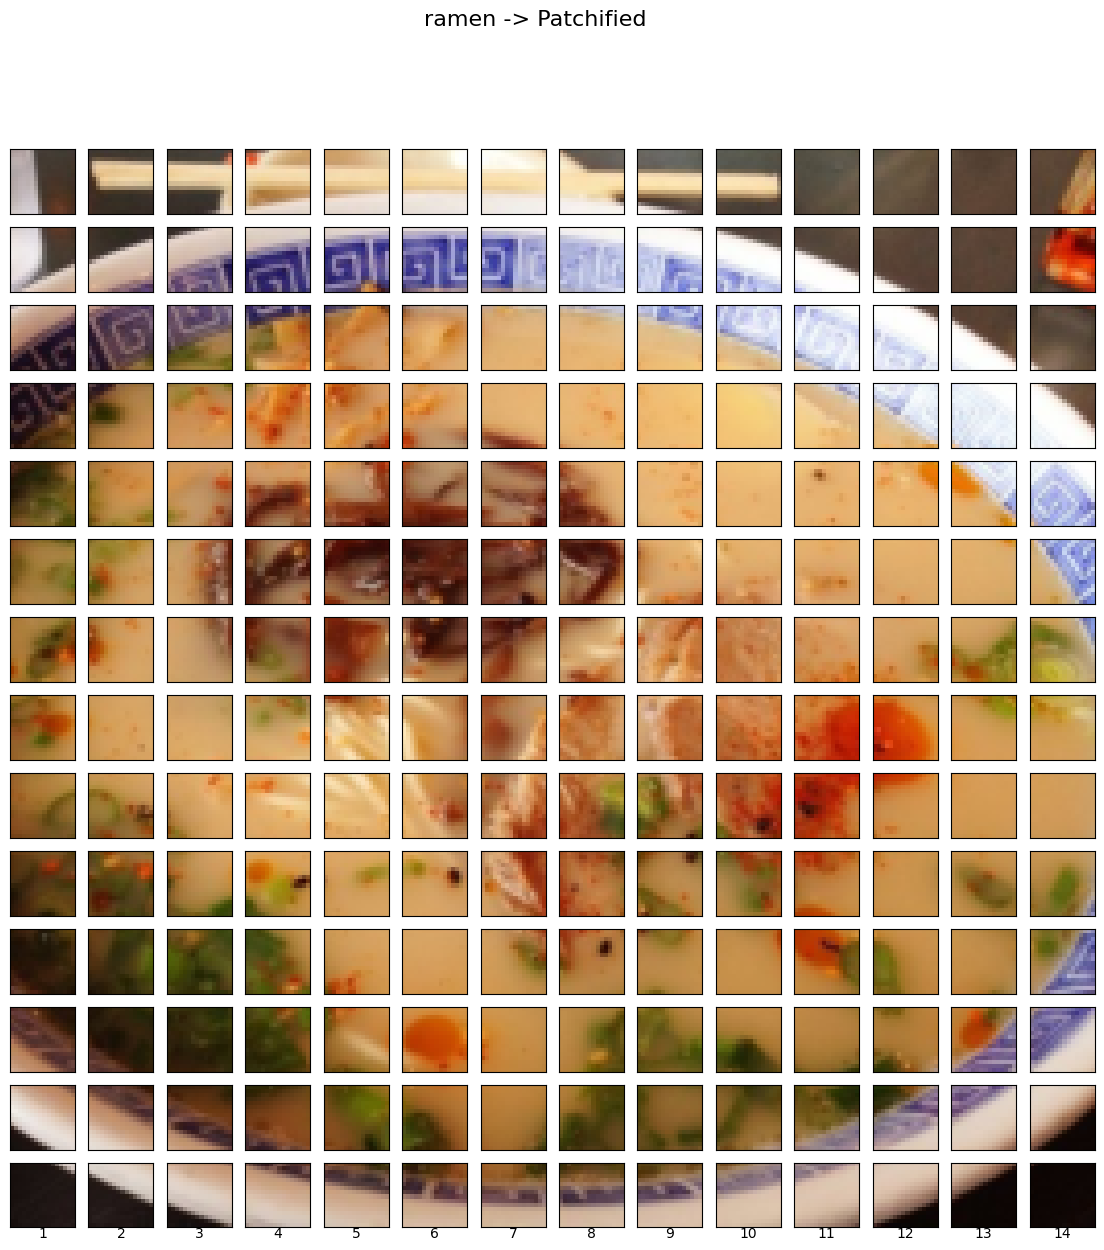

In [37]:
# Setting up hyperparameters and makle sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size//patch_size

assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"No of patches per row : {num_patches} \
        \nNo of patches per column: {num_patches} \
        \nTotal patches: {num_patches*num_patches} \
        \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Iterate through number of patches in the top row
for i, patch_height in enumerate(range(0, img_size, patch_size)):
    for j, patch_width in enumerate(range(0, img_size, patch_size)):

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels
        axs[i, j].set_xlabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

### 4.3 Creating image patches with `torch.nn.Conv2d()`

![Feature Map](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/08-vit-paper-patch-embedding-animation.gif)